In [32]:
#Listing 1-1
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [33]:
#Listing 1-2
data = pd.read_csv("C:/Users/ASUS/Tugas 2 - Analisis Big Data/trip.csv") 

In [34]:
#Listing 1-3
print(len(data))         
data.head(5) 

236065


trip_id         starttime          stoptime    bikeid  tripduration  \
0      431  10/13/2014 10:31  10/13/2014 10:48  SEA00298       985.935   
1      432  10/13/2014 10:32  10/13/2014 10:48  SEA00195       926.375   
2      433  10/13/2014 10:33  10/13/2014 10:48  SEA00486       883.831   
3      434  10/13/2014 10:34  10/13/2014 10:48  SEA00333       865.937   
4      435  10/13/2014 10:34  10/13/2014 10:49  SEA00202       923.923   

     from_station_name                                    to_station_name  \
0  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
1  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
2  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
3  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
4  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   

  from_station_id to_station_id usertype  gender  birthyear  
0          CBD-06         PS-04   Member    Male     1960.0  
1          CBD-06         PS-04   Member    Male     1970.0  
2          CBD-06         PS-04   Member  Female     1988.0  
3          CBD-06         PS-04   Member  Female     1977.0  
4          CBD-06         PS-04   Member    Male     1971.0

In [35]:
data.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

In [36]:
#Listing 1-4
data = data.sort_values(by='starttime')
data.reset_index()
print ('Date range of dataset: %s - %s' % (data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


<AxesSubplot:title={'center':'Distribution of User by membership'}, xlabel='usertype'>

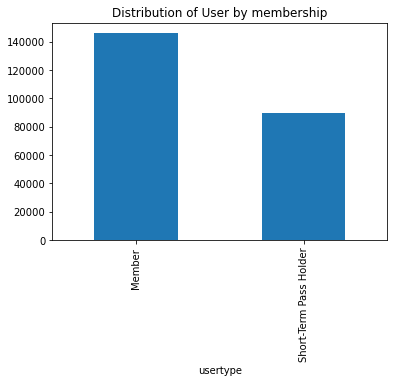

In [37]:
#Listing 1-5
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of User by membership')

<AxesSubplot:title={'center':'Distribution of Trips by Gender'}, xlabel='gender'>

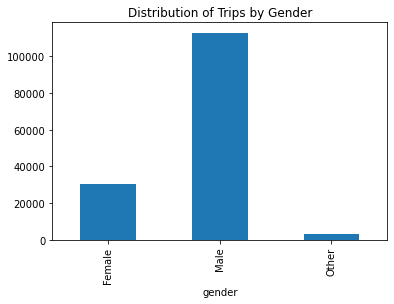

In [38]:
#Listing 1-6
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of Trips by Gender')

<AxesSubplot:title={'center':'Distribution by Birth Year'}, xlabel='birthyear'>

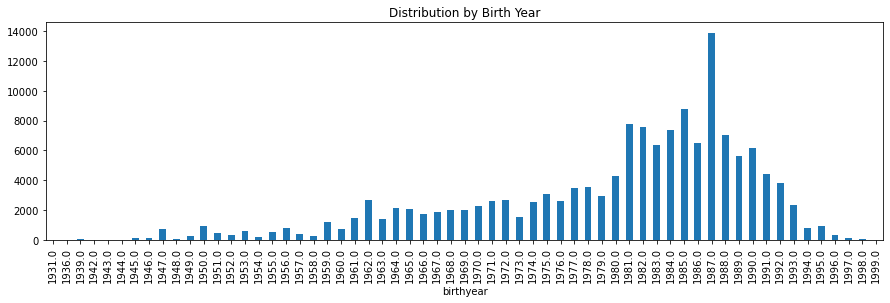

In [39]:
#Listing 1-7
data = data.sort_values(by = 'birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution by Birth Year', figsize = (15,4))

<AxesSubplot:title={'center':'Distibution of millenial user type'}, xlabel='usertype'>

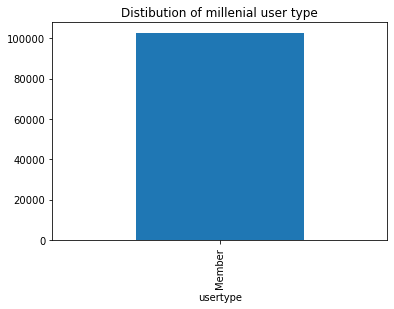

In [40]:
#listing 1-8
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear'] <= 1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distibution of millenial user type')

<AxesSubplot:title={'center':'Distribution of birth years by Gender'}, xlabel='birthyear'>

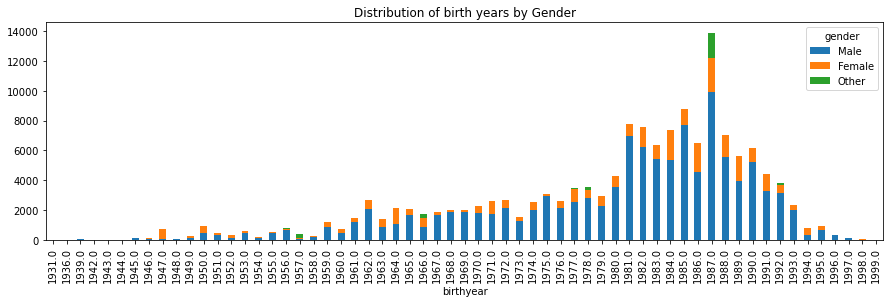

In [41]:
#Listing 1-9
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender', stacked=True, figsize = (15,4))

<AxesSubplot:title={'center':'Distribution of birth years by Usertype'}, xlabel='birthyear'>

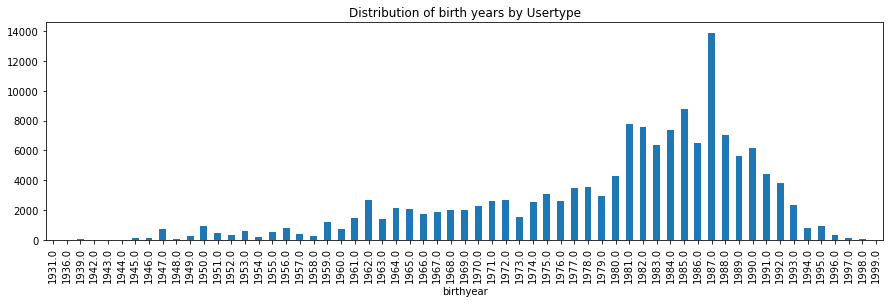

In [42]:
#Listing 1-10
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

In [43]:
#Listing 1-11
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [44]:
#Listing 1-12
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [45]:
#Listing 1-13
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

<AxesSubplot:title={'center':'Distribution of Trip duration by date'}, xlabel='starttime_date'>

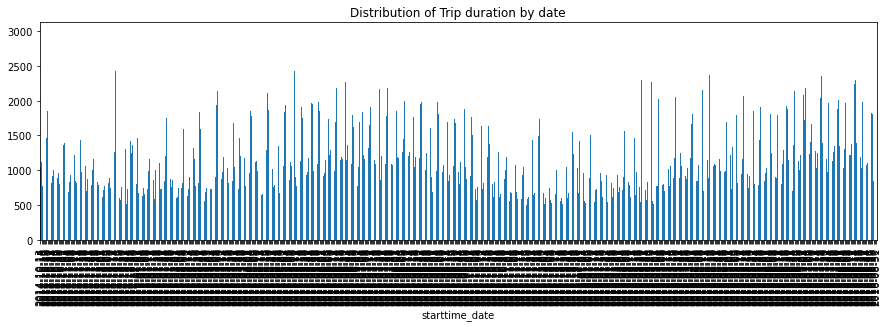

In [46]:
#Listing 1-14
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4))

In [47]:
#listing 1-15
from collections import Counter
trip_duration = list(data['tripduration'])
Station_from = list(data['from_station_name'])
data_mode = Counter(Station_from)
print('Mean of trip duration : %f' %statistics.mean(trip_duration))
print('Median of trip duration : %f' %statistics.median(trip_duration))
print('Mode of Station originate from : %s' %data_mode.most_common(1))

Mean of trip duration : 1202.612210
Median of trip duration : 633.235000
Mode of Station originate from : [('Pier 69 / Alaskan Way & Clay St', 11274)]


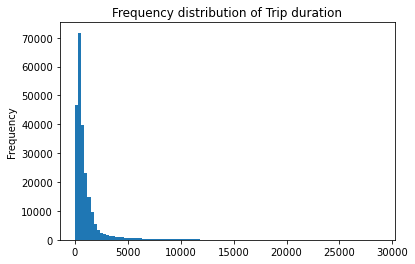

In [48]:
#Listing 1-16
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

In [49]:
#Listing 1-17
#[Q1 â€“ 1.5 (IQR) , Q3 + 1.5 (IQR) ] (i.e. IQR = Q3 - Q1)
Q3, Q1 = np.percentile(trip_duration, [3 ,1])
iqr = Q3 - Q1
print ('Proportion of Values Not Considered Outliers : %f percent'%((len(data) - len([x for x in trip_duration if Q3+(1.5*iqr) 
>=x>= Q1-(1.5*iqr)]))*100/float(len(data))))

Proportion of Values Not Considered Outliers : 91.312139 percent


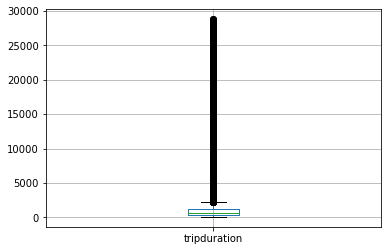

In [50]:
#Listing 1-18
box = data.boxplot(column=['tripduration'])
plt.show()

In [51]:
#Listing 1-19
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print ('Proportion of values as outlier: %f percent'%((len(data) - len([x for x in trip_duration if q75+(1.5*iqr) 
>=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


In [60]:
#Listing 1-20
# Number of outliers values = Length of all values - Length of all non outliers values
Number_of_outliers_values = len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
Number_of_outliers_values

22540

In [63]:
#Listing 1-21
Ratio_of_outliers = ( Number_of_outliers_values / len(data) ) * 100
Ratio_of_outliers

9.548217651917904

In [54]:
#Listing 1-22
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print ('Mean of trip duration: %f'%mean_trip_duration)

Mean of trip duration: 711.726573


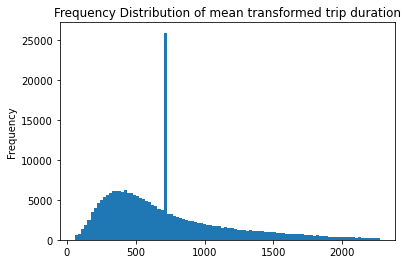

In [55]:
#Listing 1-23
upper_whisker = q75 + (1.5*iqr)

def transform_tripduration(x):
    
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins=100, title='Frequency Distribution of mean transformed trip duration')
plt.show()

In [56]:
#Listing 1-24
print ('Mean of trip duration: %f'%data['tripduration_mean'].mean())
print ('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print ('Median of trip duration: %f'%data['tripduration_mean'].median())

Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000
